# Project: tmdb-movies dataset investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Dataset Summary
- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> Questions to be answered.
- Top 5 genres in the dataset
- Top 5 movies gained profit
- Top 5 popular movies
- Year with the most produced movies
- correlation between revenue and profit
- Average profit of each year

In [1]:
# importing statements for all of the packages that we gona use.
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Processig The dataset into 3 steps:
- Gathering
- Assessing
- Cleaning

### Gathering

In [2]:
# Reading the csv file to laod the dataset
df = pd.read_csv('tmdb-movies.csv')

### Assessing

In [3]:
# Viewing the head of the dataset to find out initial notes over  data quality and tidiness.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Checking columns types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# Viewing the full image of missing values in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Viewing statistical outputs of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#Checking duplicated rows
df.duplicated().sum()

1

#### Notes for assessing process
> Checking columns types.
- release_date column type is string instead of datetime.

> Checking for duplicates.
- One duplicate found.

> Checking for NaN-values.
- Columns 'id','imdb_id','cast','tagline','overview', are not useful for analysis process.
- Column 'Release_year' is not needed as there's release_date column that contains the year. 
- Column 'homepage' has only 2936 out of 10866 non-null values.
- Columns 'budget_adj' and 'revenue_adj' have no place as we gona use the original budget and revenue columns.
- Many NaN-values through different rows have to be handled.
- Columns order are hard to be readable.


### Cleaning

In [8]:
#Converting release_date column to datetime type.
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
df['release_date'].max()

Timestamp('2070-12-24 00:00:00')

In [10]:
#Dropping duplicated rows.
df.drop_duplicates(inplace=True)

In [11]:
#dropping columns that will not be used through out the analysis process due to not being informative.
df.drop(['id','imdb_id','cast','homepage','tagline','overview','budget_adj','revenue_adj'], axis=1, inplace=True)

In [12]:
#dropping all Rows with NaN values.
df.dropna(axis=0, inplace=True)

In [13]:
#Re-ordering columns to more readable and informative order
df = df[['original_title','budget','revenue','popularity','runtime','vote_count','vote_average','release_date','release_year','director','genres','production_companies','keywords']]

#### Steps of the cleaning process
- Converting release_date column from string to datetime.
- Dropping duplicates
- Dropping columns 'id','imdb_id','cast','homepage','tagline','overview''budget_adj','revenue_adj as they are not needed for analysis process.
- Dropping column 'homepage' as it has only 2936 out of 10866 non-null values.
- Dropping columns 'budget_adj' and 'revenue_adj' as they have no place for using the original budget and revenue columns.
- Cleaning the data by droping all NaN-values left.
- Re-ordering columns to more readable and informative order

### Testing

In [14]:
# Making initial perspective if the cleaning steps were performed correctly.
df.tail()

,original_title,budget,revenue,popularity,runtime,vote_count,vote_average,release_date,release_year,director,genres,production_companies,keywords
10861,The Endless Summer,0,0,0.080598,95,11,7.4,2066-06-15,1966,Bruce Brown,Documentary,Bruce Brown Films,surfer|surfboard|surfing
10862,Grand Prix,0,0,0.065543,176,20,5.7,2066-12-21,1966,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,car race|racing|formula 1
10863,Beregis Avtomobilya,0,0,0.065141,94,11,6.5,2066-01-01,1966,Eldar Ryazanov,Mystery|Comedy,Mosfilm,car|trolley|stealing car
10864,"What's Up, Tiger Lily?",0,0,0.064317,80,22,5.4,2066-11-02,1966,Woody Allen,Action|Comedy,Benedict Pictures Corp.,spoof
10865,Manos: The Hands of Fate,19000,0,0.035919,74,15,1.5,2066-11-15,1966,Harold P. Warren,Horror,Norm-Iris,fire|gun|drive|sacrifice|flashlight


In [15]:
# Making sure there are no more Nan-Values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8691 entries, 0 to 10865
Data columns (total 13 columns):
original_title          8691 non-null object
budget                  8691 non-null int64
revenue                 8691 non-null int64
popularity              8691 non-null float64
runtime                 8691 non-null int64
vote_count              8691 non-null int64
vote_average            8691 non-null float64
release_date            8691 non-null datetime64[ns]
release_year            8691 non-null int64
director                8691 non-null object
genres                  8691 non-null object
production_companies    8691 non-null object
keywords                8691 non-null object
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 950.6+ KB


In [16]:
#Checking if release_date column changed correctly from int to datetime and other columns hold the correct type.
df.dtypes

original_title                  object
budget                           int64
revenue                          int64
popularity                     float64
runtime                          int64
vote_count                       int64
vote_average                   float64
release_date            datetime64[ns]
release_year                     int64
director                        object
genres                          object
production_companies            object
keywords                        object
dtype: object

In [17]:
#Checking if dropping duplicates step preformed correctly.
df.duplicated().sum()

0

#### Reasons of testing
- Making sure the cleaning steps took place.
- Making sure the dataset is ready for the EDA.

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the data, Now we're going to compute some statistics and visualize the data.

### Top 5 genres in the dataset

In [18]:
#Displayed dataframe for the most created genres in the dataset.
df.genres.value_counts().head(5)

Drama             566
Comedy            525
Drama|Romance     248
Comedy|Drama      233
Comedy|Romance    223
Name: genres, dtype: int64

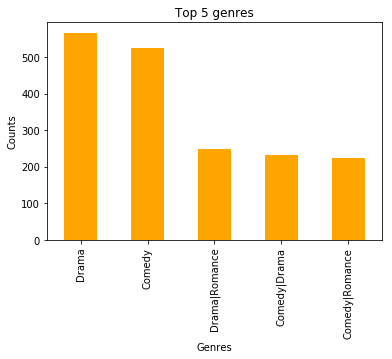

In [19]:
#Visualizing most created gnres in the dataset.
def visual(q_visual):
    plt.title('Top 5 genres')
    plt.xlabel('Genres')
    plt.ylabel('Counts')
visual(df.genres.value_counts().head(5).plot(kind='bar',color='orange'))

### Top 5 movies gained profit

In [20]:
#displaying data frame of top 5 movies gained profit.
df['profit'] = df['revenue'] - df['budget']
df.nlargest(5,'profit')

,original_title,budget,revenue,popularity,runtime,vote_count,vote_average,release_date,release_year,director,genres,production_companies,keywords,profit
1386,Avatar,237000000,2781505847,9.432768,162,8458,7.1,2009-12-10,2009,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,culture clash|future|space war|space colony|so...,2544505847
3,Star Wars: The Force Awakens,200000000,2068178225,11.173104,136,5292,7.5,2015-12-15,2015,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,android|spaceship|jedi|space opera|3d,1868178225
5231,Titanic,200000000,1845034188,4.355219,194,4654,7.3,1997-11-18,1997,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,shipwreck|iceberg|ship|panic|titanic,1645034188
0,Jurassic World,150000000,1513528810,32.985763,124,5562,6.5,2015-06-09,2015,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,monster|dna|tyrannosaurus rex|velociraptor|island,1363528810
4,Furious 7,190000000,1506249360,9.335014,137,2947,7.3,2015-04-01,2015,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,car race|speed|revenge|suspense|car,1316249360


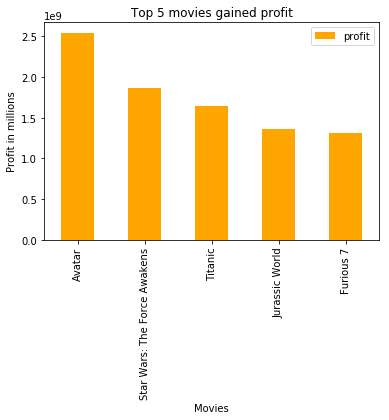

In [21]:
#visualized data of the top 5 movied gained profit.
visual(df.nlargest(5,'profit').plot(x='original_title', y= 'profit',kind='bar',color='orange'))
plt.title('Top 5 movies gained profit')
plt.xlabel('Movies')
plt.ylabel('Profit in millions');

In [22]:
#Displaying dataframe of the 5 most popular movies.
df.nlargest(5,'popularity')

,original_title,budget,revenue,popularity,runtime,vote_count,vote_average,release_date,release_year,director,genres,production_companies,keywords,profit
0,Jurassic World,150000000,1513528810,32.985763,124,5562,6.5,2015-06-09,2015,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,monster|dna|tyrannosaurus rex|velociraptor|island,1363528810
1,Mad Max: Fury Road,150000000,378436354,28.419936,120,6185,7.1,2015-05-13,2015,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,future|chase|post-apocalyptic|dystopia|australia,228436354
629,Interstellar,165000000,621752480,24.949134,169,6498,8.0,2014-11-05,2014,Christopher Nolan,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,saving the world|artificial intelligence|fathe...,456752480
630,Guardians of the Galaxy,170000000,773312399,14.311205,121,5612,7.9,2014-07-30,2014,James Gunn,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,marvel comic|spaceship|space|scene during end ...,603312399
2,Insurgent,110000000,295238201,13.112507,119,2480,6.3,2015-03-18,2015,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,based on novel|revolution|dystopia|sequel|dyst...,185238201


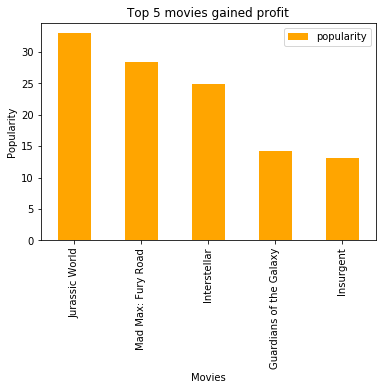

In [23]:
#Displaying dataframe of the 5 most popular movies.
df.nlargest(5,'popularity')
visual(df.nlargest(5,'popularity').plot(x='original_title', y= 'popularity',kind='bar',color='orange'))
plt.title('Top 5 movies gained profit')
plt.xlabel('Movies')
plt.ylabel('Popularity');

In [24]:
#Year with most produced movies
df['release_year'].mode()

0    2014
dtype: int64

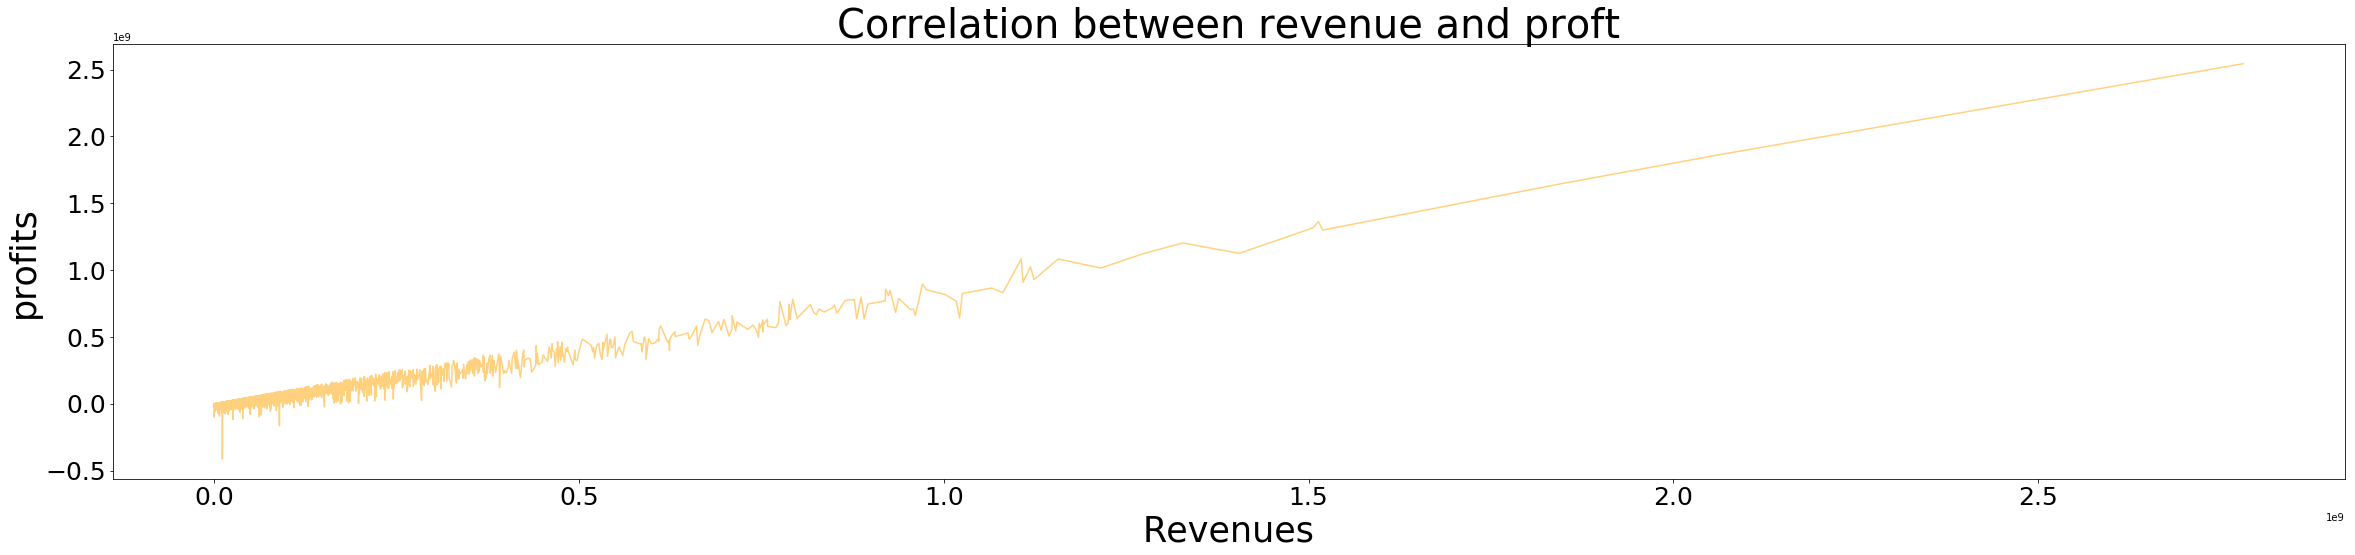

In [25]:
#correlation between vote count and vote average.
df.groupby('revenue')['profit'].mean().plot(figsize=(40,8),color='orange',fontsize=25,alpha=0.5);
plt.title('Correlation between revenue and proft', fontsize=  40)
plt.xlabel('Revenues',fontsize= 35)
plt.ylabel('profits', fontsize= 35);

The above graph displays a correlation between revenue and profit, that indicates The more profit we make the more profit we gain meaning a positive relationship between both of them.


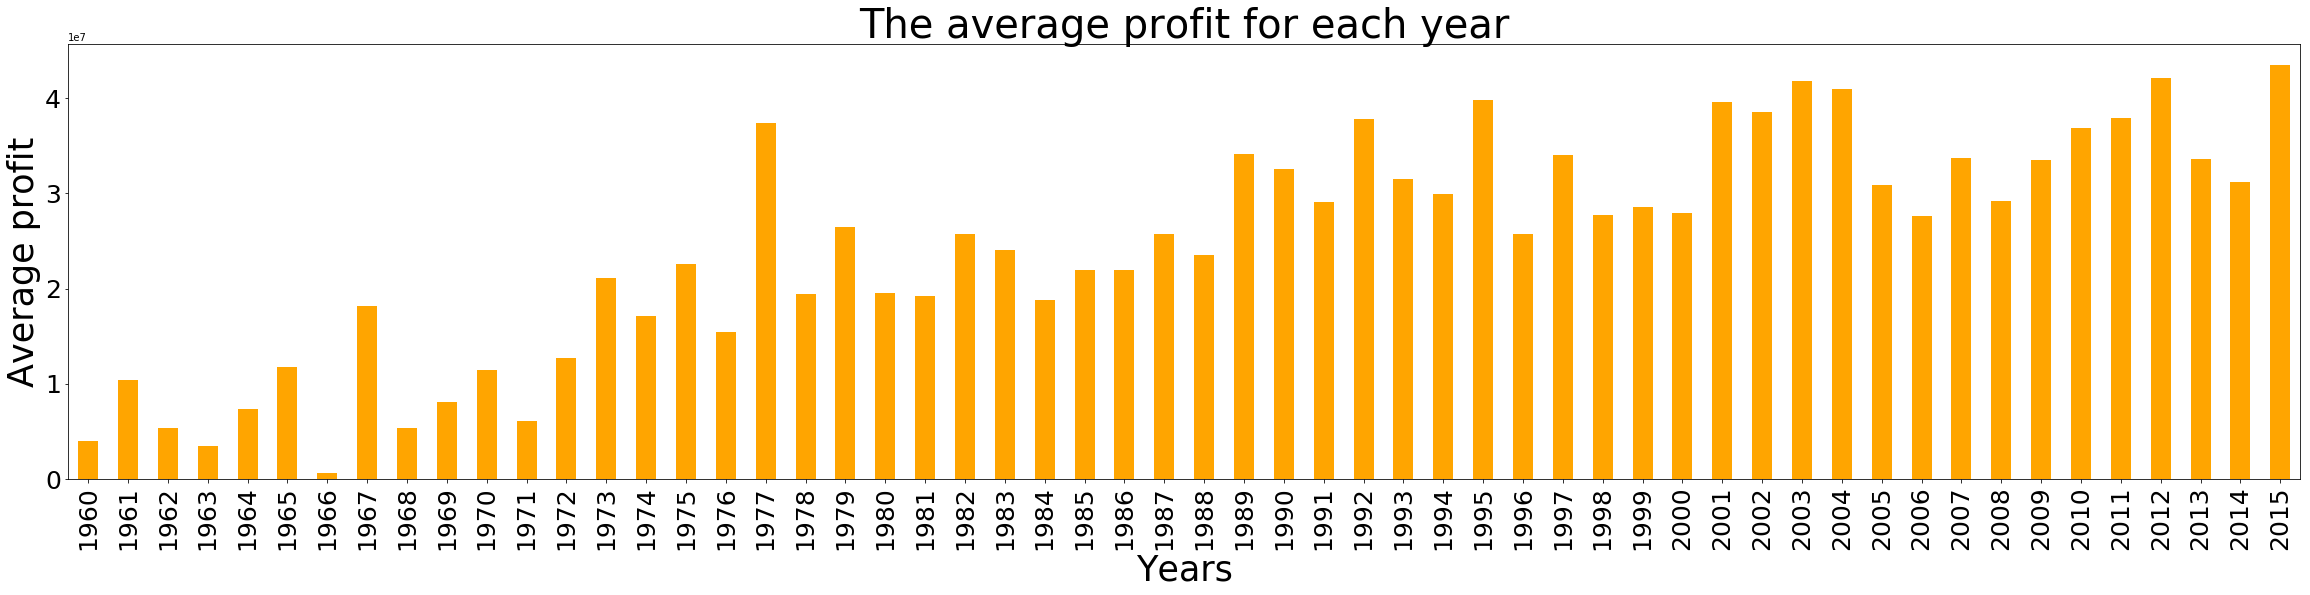

In [26]:
#Visualizing the average profit for each year

df.groupby('release_year')['profit'].mean().plot(kind='bar',figsize=(40,8),color='orange',fontsize=25)
plt.title('The average profit for each year',fontsize=40)
plt.xlabel('Years',fontsize= 35)
plt.ylabel('Average profit', fontsize= 35);

<a id='conclusions'></a>
## Conclusions

> I have been cleaning the data from nan values and duplicates, making sure every columns hold correct type then reordering columns to more readable order, then computing simple stasticals data for the Top 5 genres in the dataset,Top 5 movies gained profit, Top 5 popular movie, Year with the most produced movies, correlation between revenue and profit
,The Average profit of each year and visulazing the output to each of them.

### Limitations
- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
- There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0